In [1]:
import pandas as pd
import matplotlib.pyplot as plt
base = pd.read_csv('Datasets/MoviesOnStreamingPlatforms.csv')
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


In [3]:
base.head()

Unnamed: 0  ID                                     Title  Year  Age  \
0           0   1                              The Irishman  2019  18+   
1           1   2                                    Dangal  2016   7+   
2           2   3  David Attenborough: A Life on Our Planet  2020   7+   
3           3   4         Lagaan: Once Upon a Time in India  2001   7+   
4           4   5                                      Roma  2018  18+   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  
0          98/100        1     0            0        0     0  
1          97/100        1     0            0        0     0  
2          95/100        1     0            0        0     0  
3          94/100        1     0            0        0     0  
4          94/100        1     0            0        0     0

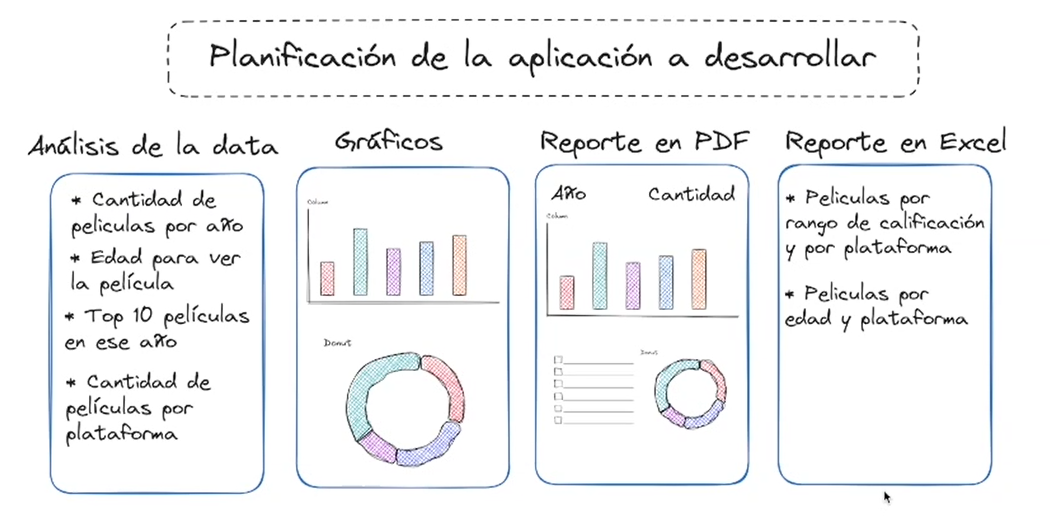

## Análisis de la data

In [10]:
cantidad_year = base.groupby(by = 'Year').count()[['ID']].reset_index() #Número de películas por año
cantidad_year.columns = ['Year','Amount']
cantidad_year

Year  Amount
0    1914       1
1    1915       2
2    1916       1
3    1919       1
4    1920       2
..    ...     ...
98   2017     831
99   2018     945
100  2019    1014
101  2020     862
102  2021     327

[103 rows x 2 columns]

In [11]:
year = 2021
base_filtrada_year = base[base['Year']==year]

cantidad_aux = base.groupby(by = 'Age').count()[['ID']].reset_index() #Número de películas por año
cantidad_aux.columns = ['Year','Amount']
cantidad_aux

Year  Amount
0  13+     998
1  16+     276
2  18+    2276
3   7+    1090
4  all     698

In [23]:
# Otro método para crear el ranking
base['Rotten Tomatoes'].str.split('/',expand = True)[0].fillna(0)

0       98
1       97
2       95
3       94
4       94
        ..
9510    14
9511    13
9512    13
9513    10
9514    10
Name: 0, Length: 9515, dtype: object

In [24]:
def select_characters(n):
    try:
        return n[:2]#Tomo los dos primeros caracteres
    except:
        return 0

base['Ranking'] = base['Rotten Tomatoes'].apply(select_characters).astype(int)

base.sort_values(by = 'Ranking', ascending = False)[:10][['Title','Age']].reset_index(drop = True)

Title  Age
0                              The Irishman  18+
1                                    Dangal   7+
2                              Mary Poppins  all
3  David Attenborough: A Life on Our Planet   7+
4                           The Dark Knight  13+
5         Lagaan: Once Upon a Time in India   7+
6                                      Roma  18+
7         To All the Boys I've Loved Before  13+
8                        The Social Dilemma  13+
9                                   Tumbbad  NaN

In [27]:
year = 2021
base_filtrada_year = base[base['Year']==year]

base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum()

Netflix        201
Hulu            37
Prime Video     63
Disney+         28
dtype: int64

## Gráficos

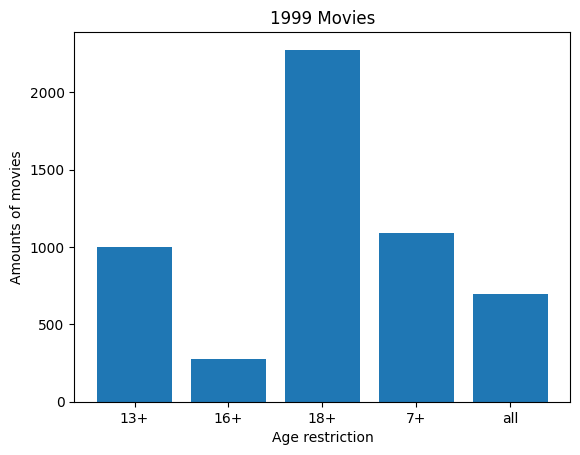

In [55]:
year = 1999
base_filtrada_year = base[base['Year']==year]

cantidad_por_edad = base.groupby(by = 'Age').count()[['ID']].reset_index() #Número de películas por año
cantidad_por_edad.columns = ['Age restriction','Amount']
plt.bar(cantidad_por_edad['Age restriction'],cantidad_por_edad['Amount'])

plt.xlabel('Age restriction')
plt.ylabel('Amounts of movies')
plt.title(f'{year} Movies')

plt.show()

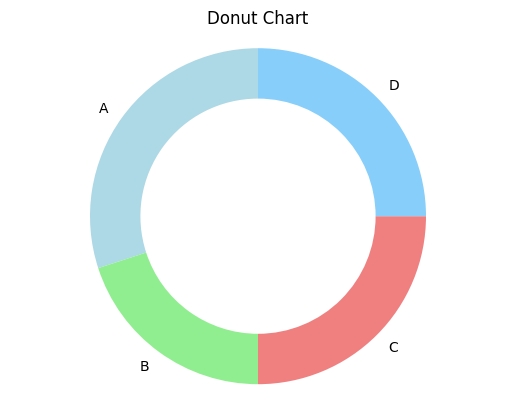

In [36]:
year = 2021
base_filtrada_year = base[base['Year']==year]

base_plataforma = base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum()

# Sample data
labels = ['A', 'B', 'C', 'D']
sizes_outer = [30, 20, 25, 25]  # Outer circle sizes
sizes_inner = [10, 10, 10, 10]  # Inner circle sizes
colors_outer = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']  # Outer circle colors
colors_inner = ['white', 'white', 'white', 'white']  # Inner circle colors

# Plotting the outer pie chart (donut)
plt.pie(base_plataforma[''], labels=labels, colors=colors_outer, startangle=90, wedgeprops=dict(width=0.3))

# Plotting the inner pie chart (hole)
plt.pie(sizes_inner, colors=colors_inner, radius=0.6, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding a circle in the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.4,color='white',fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the plot
plt.title('Donut Chart')
plt.show()

## Generador de gráficos clase

In [49]:
import altair as alt
years = base[base['Year'] >= 1990]['Year'].unique()
years.sort()
 
for year in years:
    base_filtrada_year = base[base['Year']==year]
    cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
    cantidad_year.columns = ['Age','Amount']
    cantidad_year['Year'] = year
 
    if year == years[0]:
        df = cantidad_year
    else:
        df = pd.concat([df,cantidad_year])
 
df['Year'] = df['Year'].astype(str)
alt.Chart(df).mark_bar().encode(
    x='Year:O',
    y='Amount:Q',
    color='Age:N'
)



alt.Chart(...)

In [17]:
def dona_grafico(year): 
    base_filtrada_year = base[base['Year']==year]
    cantidad_year = base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum().reset_index()
    cantidad_year.columns = ['Platform','Amount']
    
    plt.figure(figsize=(6, 6))
    plt.pie(cantidad_year['Amount'], labels=cantidad_year['Platform'], autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
    plt.title('Donut Chart: Movies by Platform')
    plt.savefig(f'Images/donut_platform_year_{year}.png')
    plt.close

In [16]:
def histograma_grafico(year):
    base_filtrada_year = base[base['Year']==year]

    cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
    cantidad_year.columns = ['Age','Amount']
    cantidad_year

    # Crear el gráfico de barras usando Matplotlib
    plt.figure(figsize=(10, 6))  # Configura el tamaño del gráfico
    plt.bar(cantidad_year['Age'], cantidad_year['Amount'], color='blue')  # Crea barras

    # Añadiendo título y etiquetas
    plt.title('Cantidad por Edad en el Año 1999')
    plt.xlabel('Edad')
    plt.ylabel('Cantidad')

    # Mostrar valores en las barras
    for i, v in enumerate(cantidad_year['Amount']):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

    # Mostrar el gráfico
    plt.savefig(f'images/histogram_age_year_{year}.png')
    plt.close()

## Reporte en pdf

In [2]:
from fpdf import FPDF

class PDFWithBackground(FPDF):
    def __init__(self):
        super().__init__()
        self.background = None
 
    def set_background(self, image_path):
        self.background = image_path
 
    def add_page(self, orientation=''):
        super().add_page(orientation)
        if self.background:
            self.image(self.background, 0, 0, self.w, self.h)
 
    def footer(self):
        # Posición a 1.5 cm desde el fondo
        self.set_y(-15)
        # Configurar la fuente para el pie de página
        self.set_font('Arial', 'I', 8)
        # Número de página
        self.cell(0, 10, 'Página ' + str(self.page_no()), 0, 0, 'C')

c:\Users\Jhon Jairo\Desktop\Modulo_2\Proyecto_peliculas\Movie_app_python_course\Env\lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


El año 1917 no se encuentra en la base.


c:\Users\Jhon Jairo\Desktop\Modulo_2\Proyecto_peliculas\Movie_app_python_course\Env\lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


El año 1918 no se encuentra en la base.
El año 1921 no se encuentra en la base.


c:\Users\Jhon Jairo\Desktop\Modulo_2\Proyecto_peliculas\Movie_app_python_course\Env\lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx
c:\Users\Jhon Jairo\Desktop\Modulo_2\Proyecto_peliculas\Movie_app_python_course\Env\lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


El año 1924 no se encuentra en la base.


c:\Users\Jhon Jairo\Desktop\Modulo_2\Proyecto_peliculas\Movie_app_python_course\Env\lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


El año 1926 no se encuentra en la base.


C:\Users\Jhon Jairo\AppData\Local\Temp\ipykernel_448\3532794359.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))  # Configura el tamaño del gráfico
C:\Users\Jhon Jairo\AppData\Local\Temp\ipykernel_448\3045224278.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


''

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


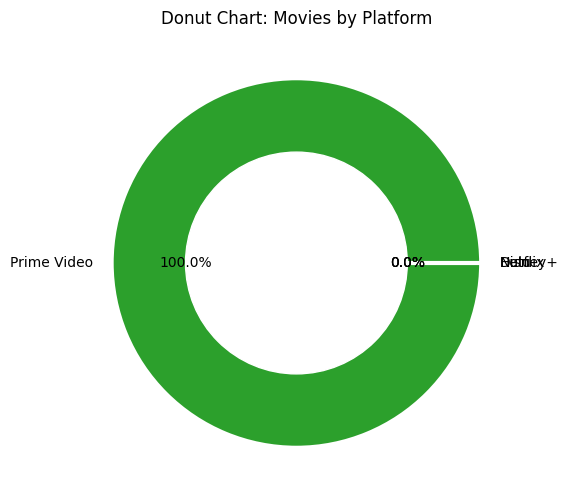

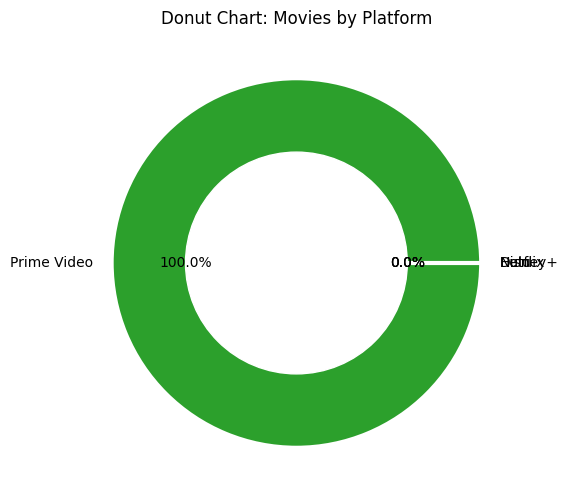

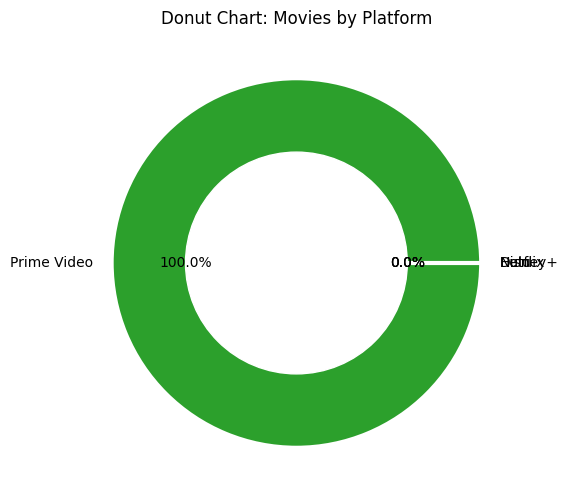

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

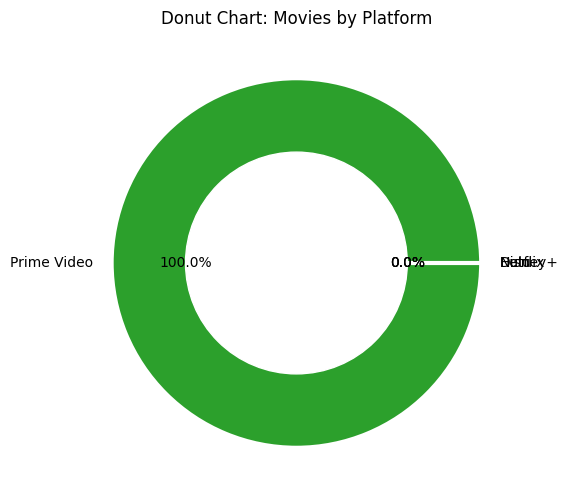

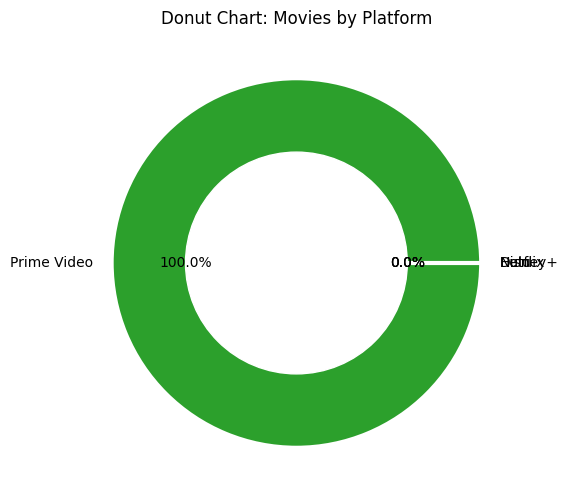

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

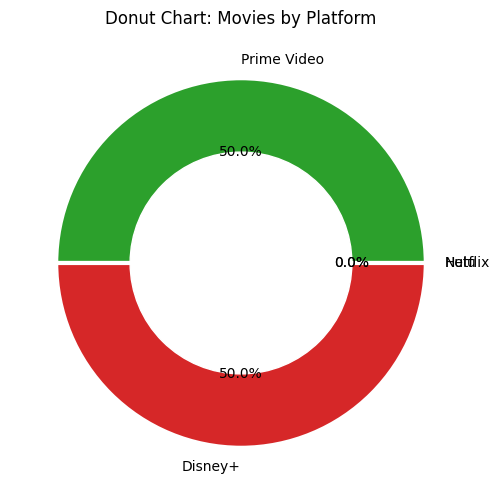

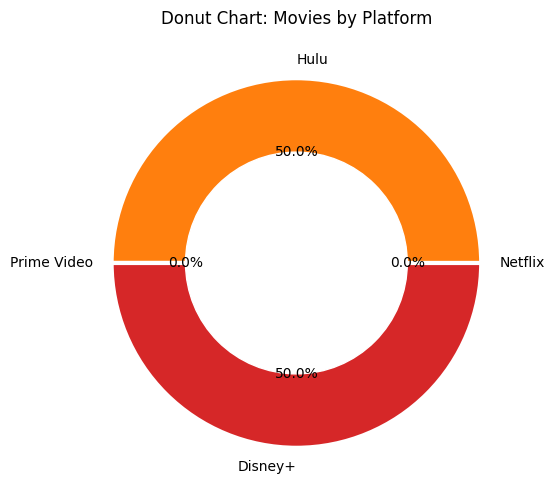

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

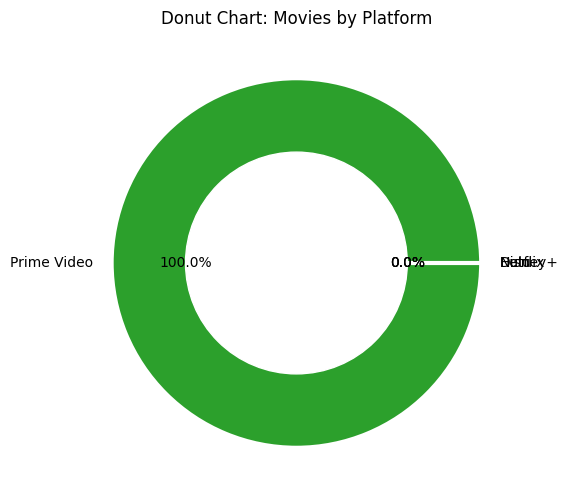

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

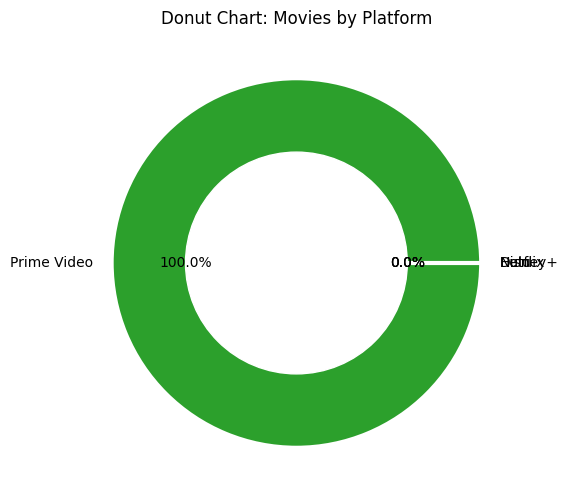

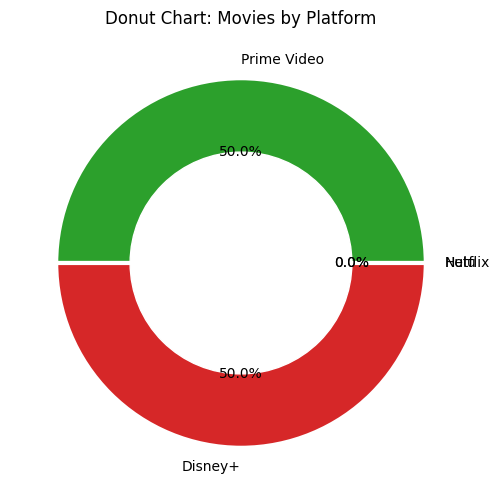

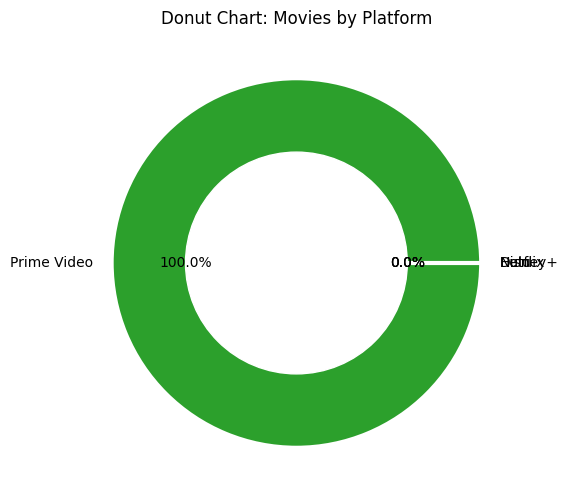

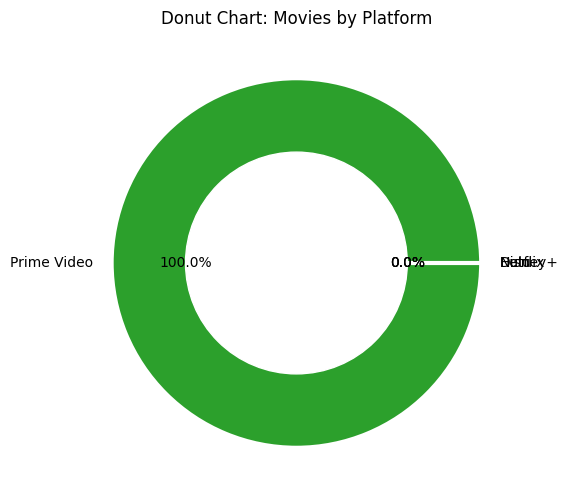

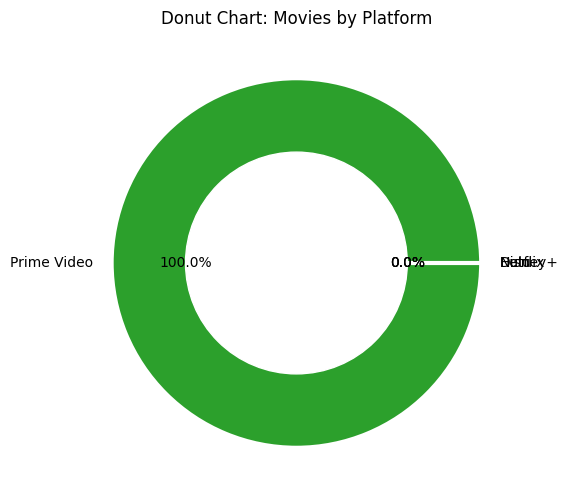

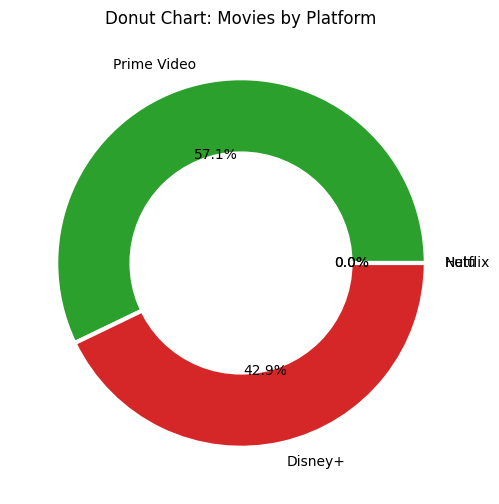

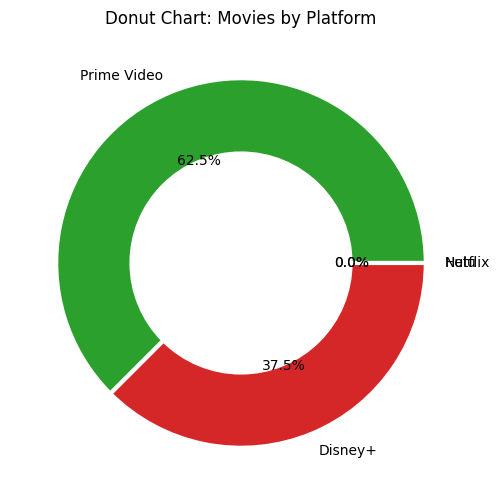

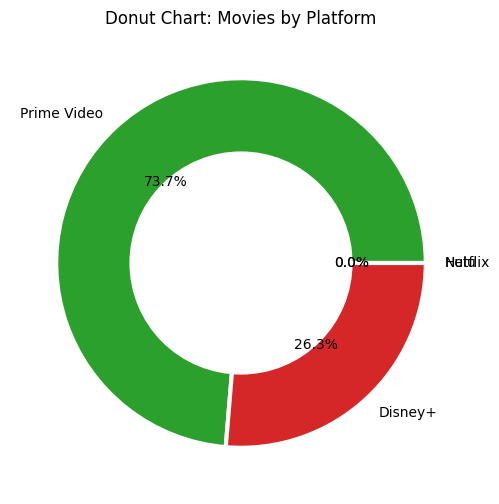

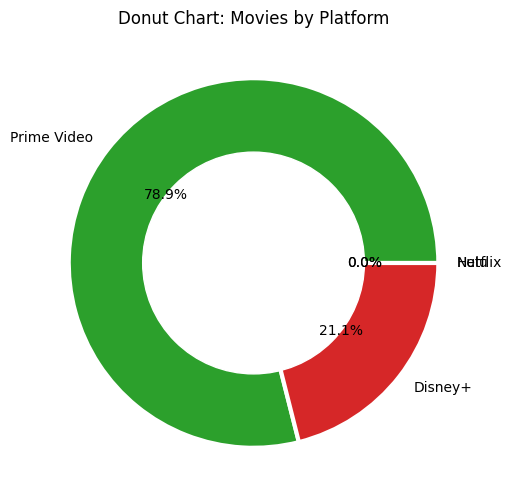

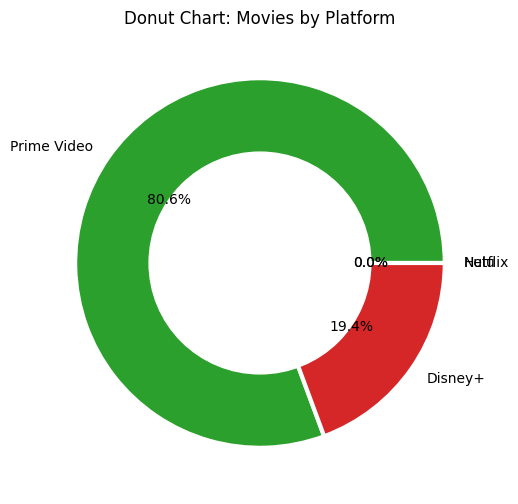

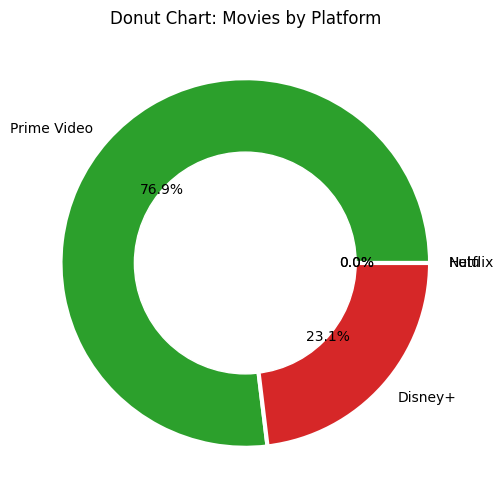

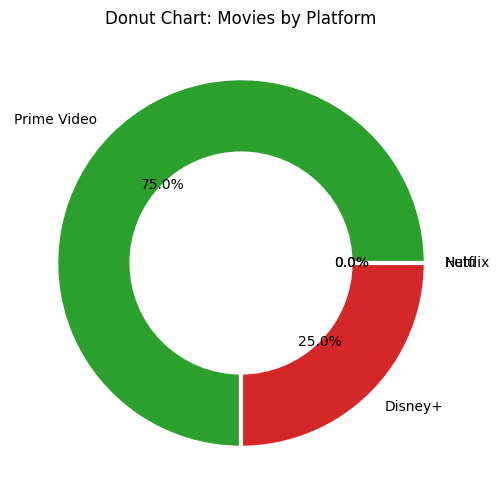

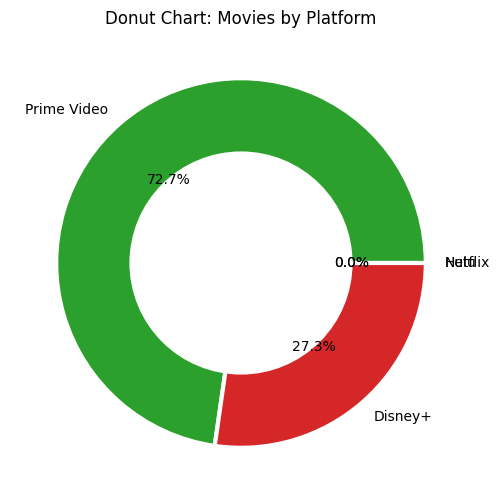

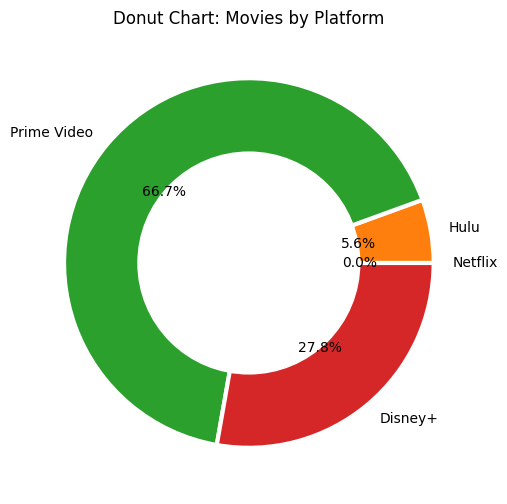

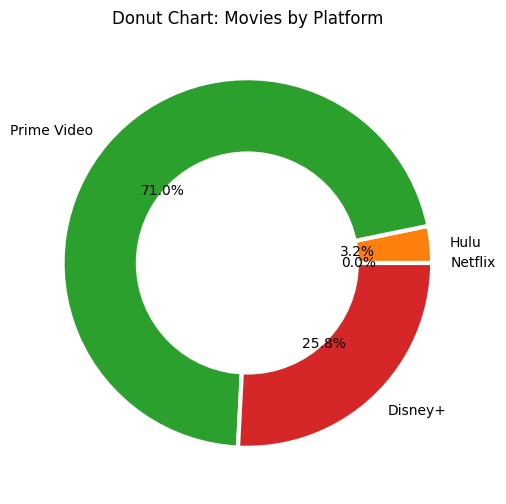

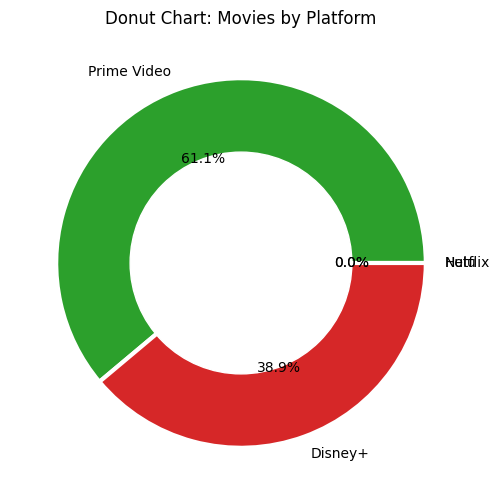

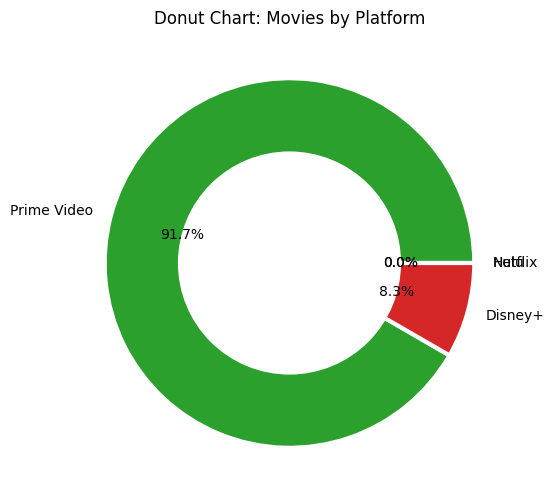

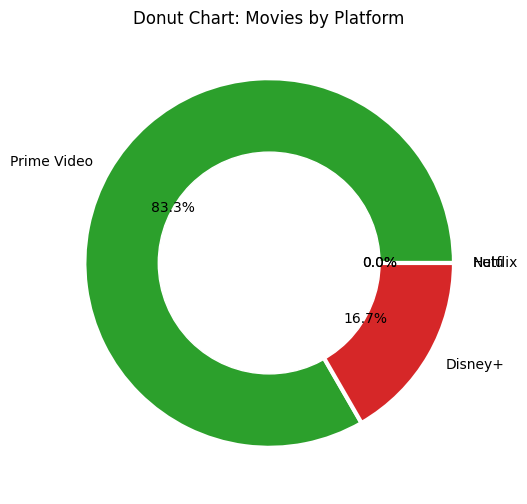

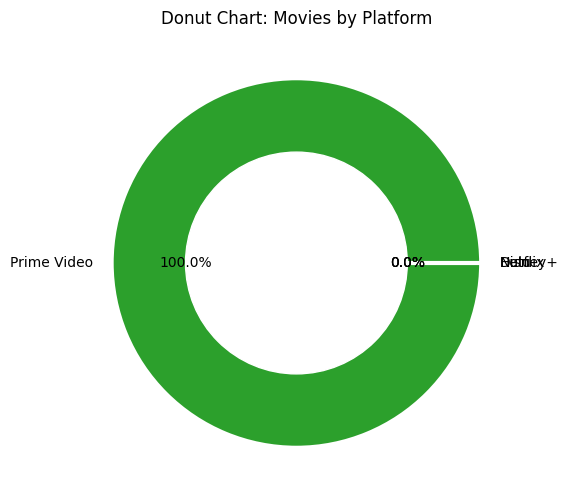

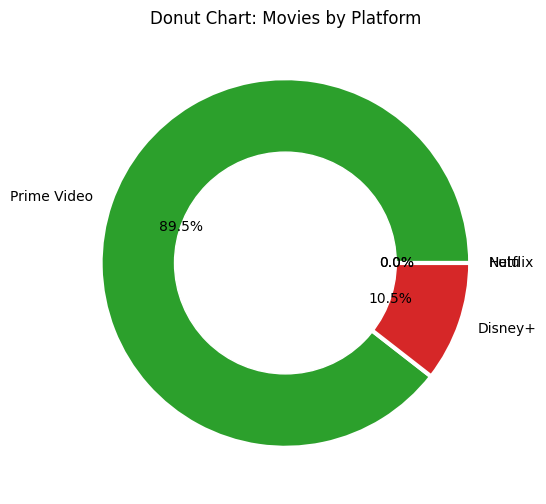

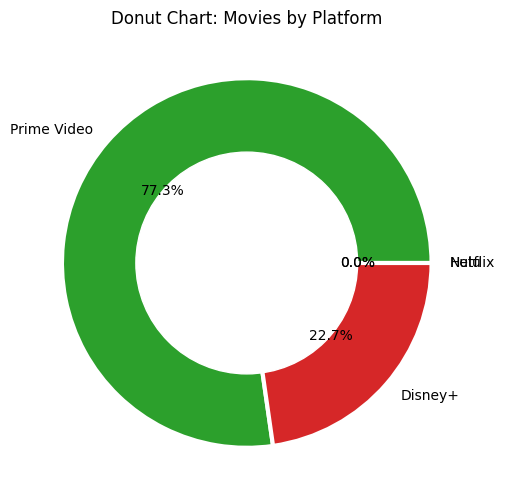

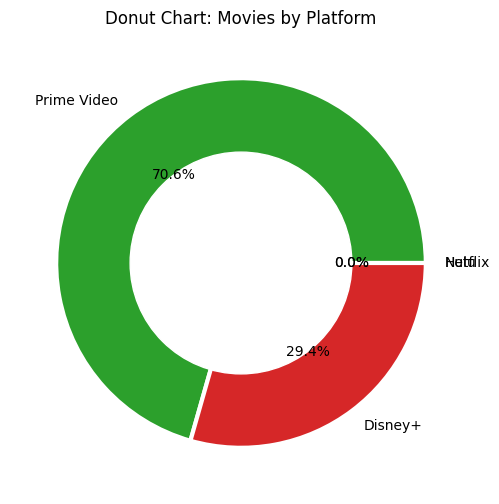

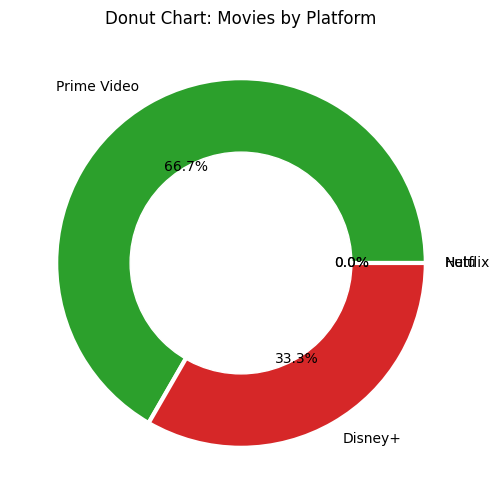

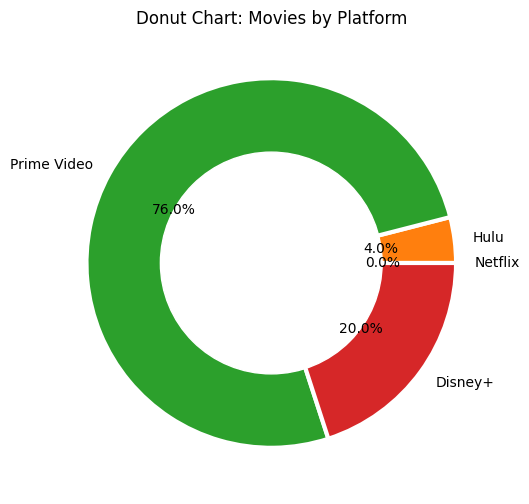

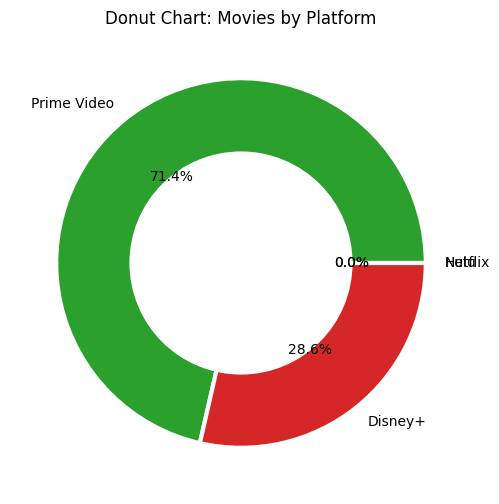

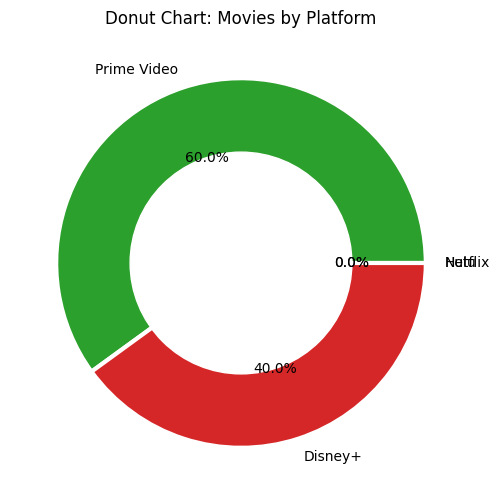

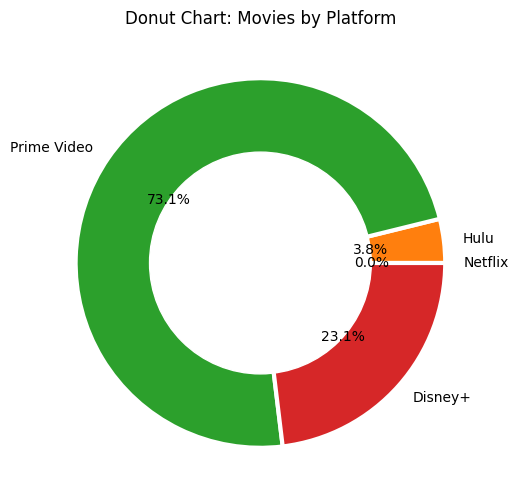

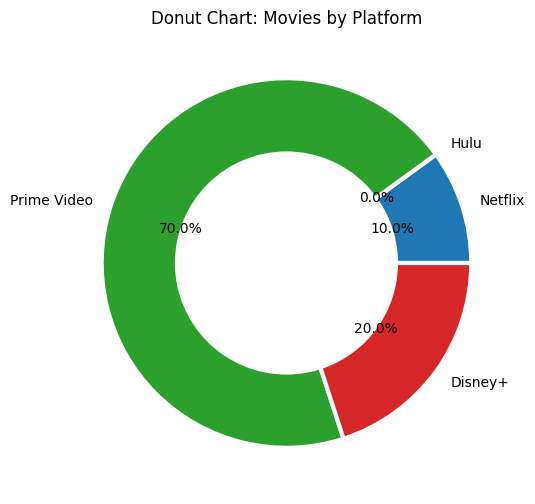

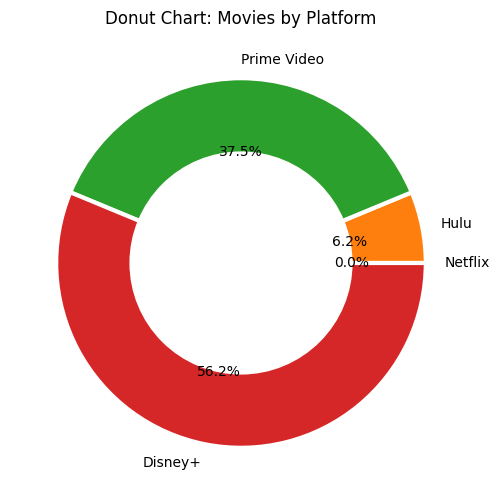

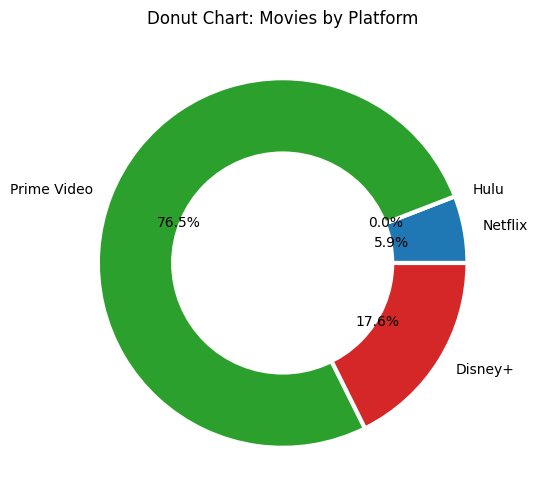

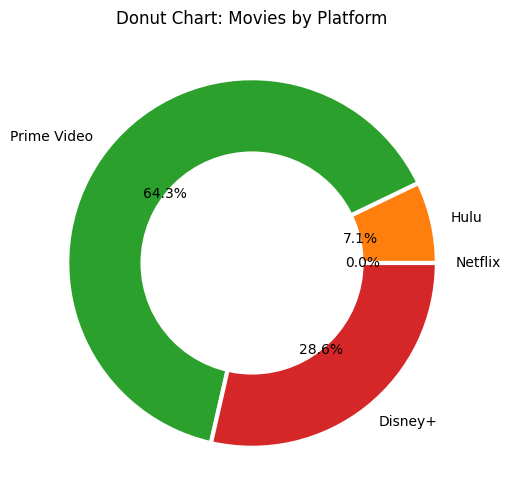

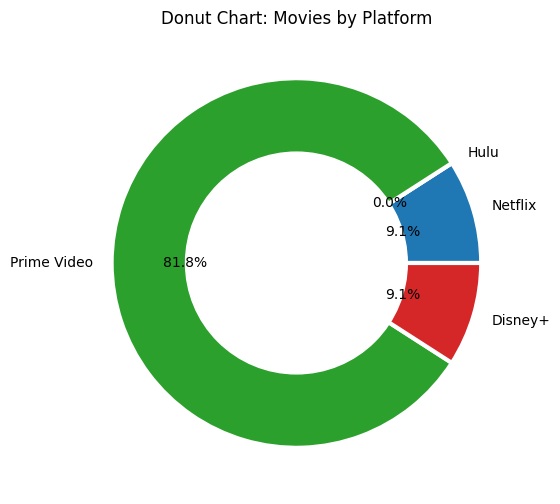

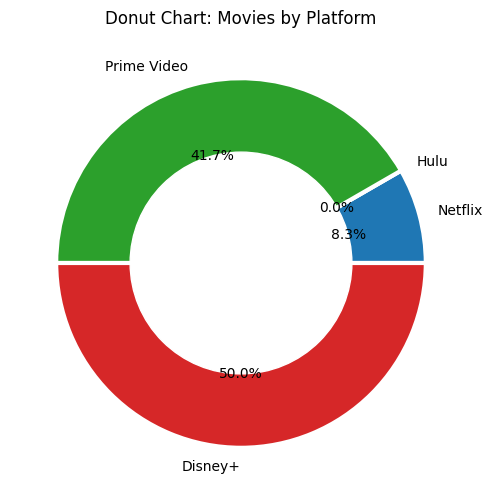

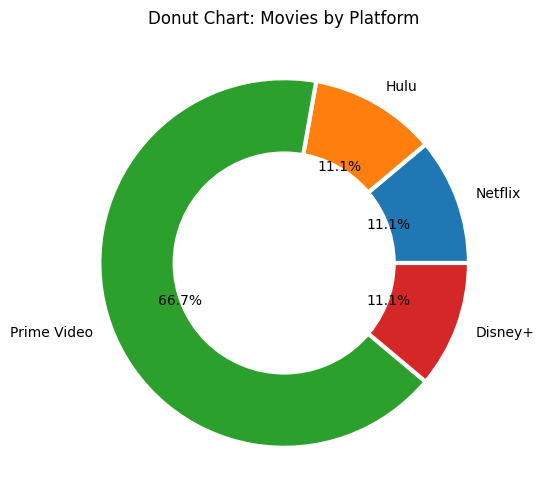

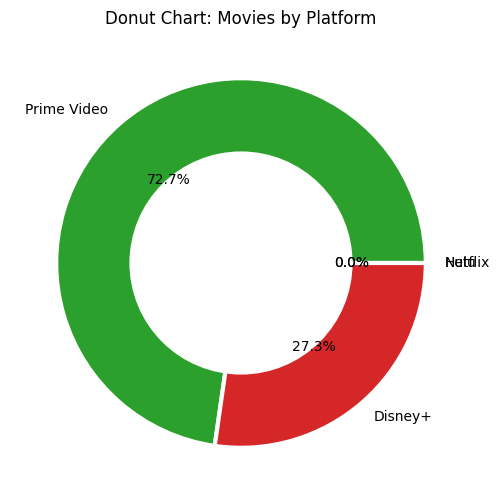

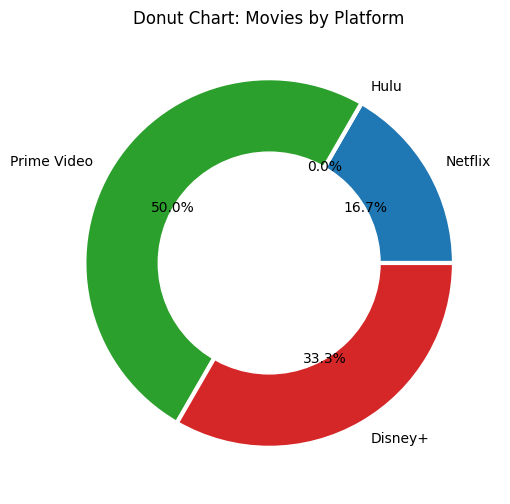

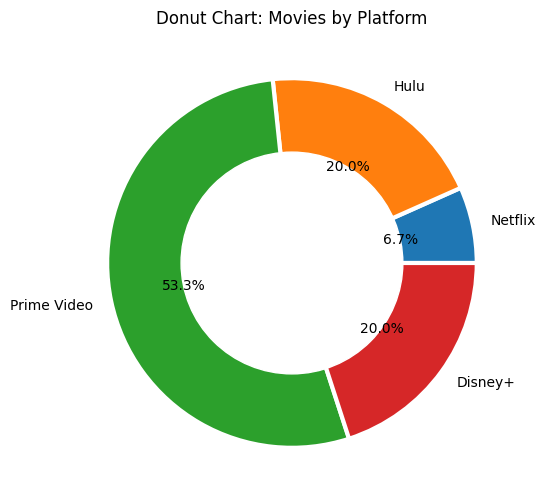

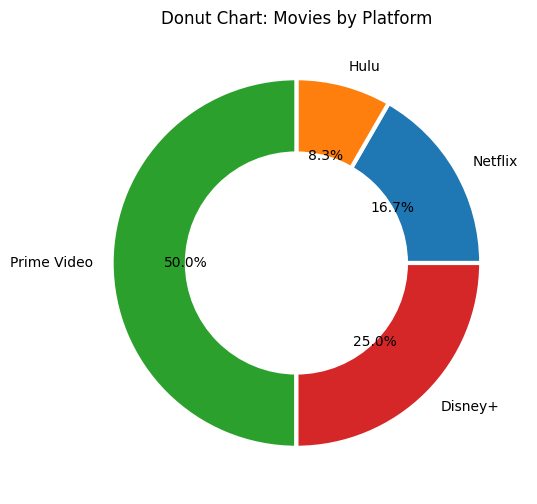

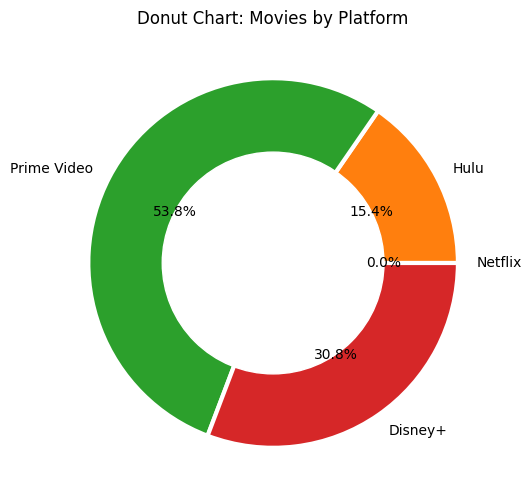

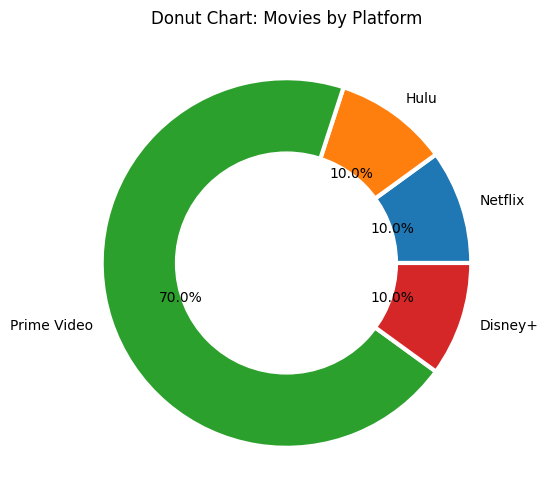

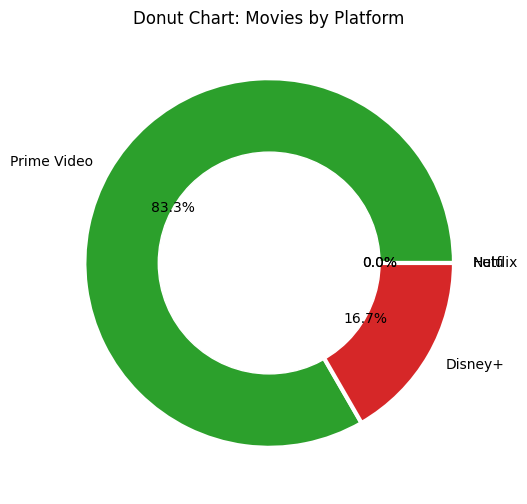

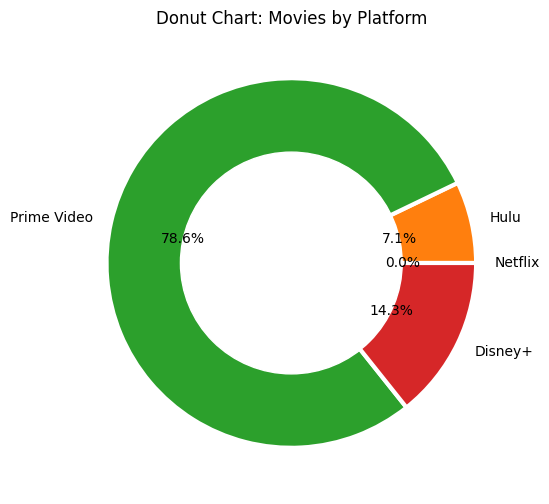

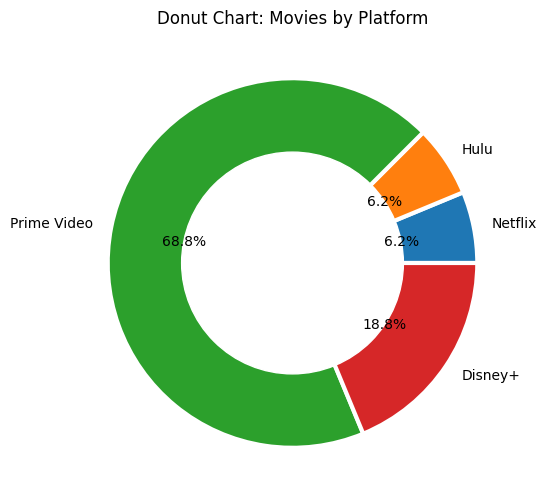

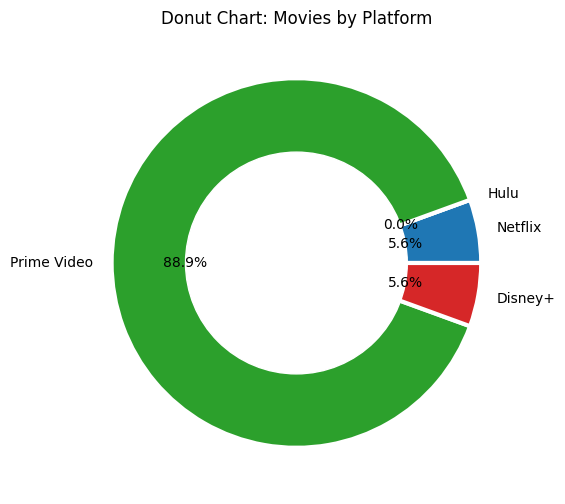

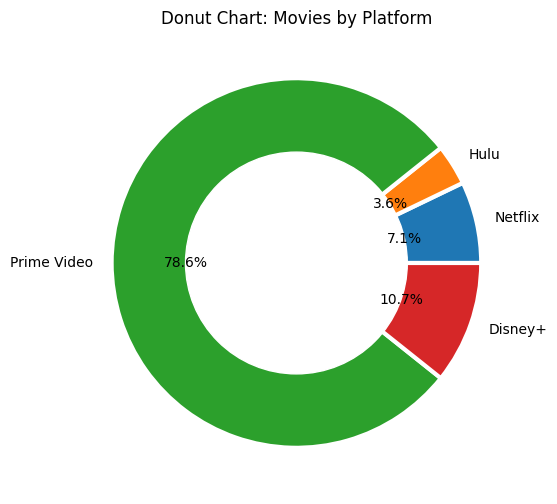

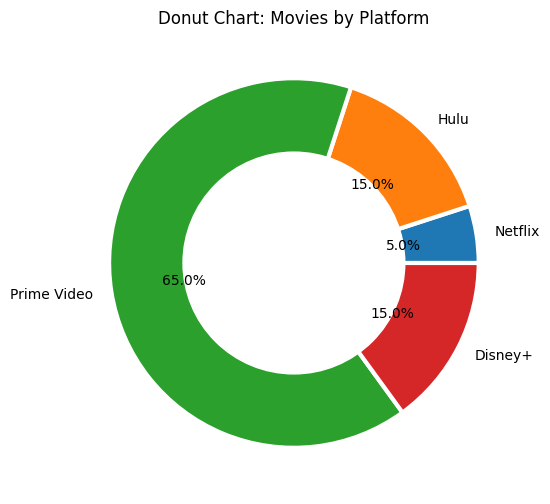

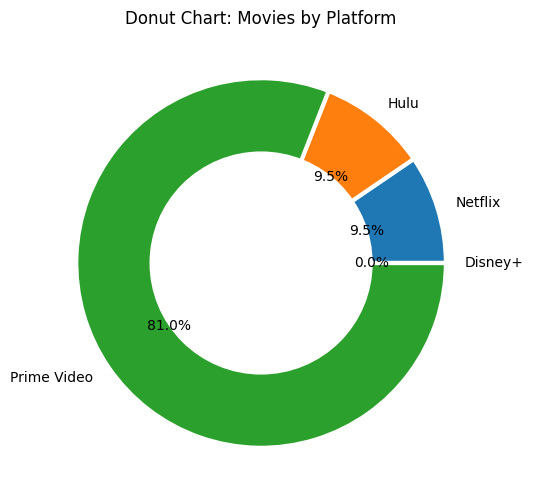

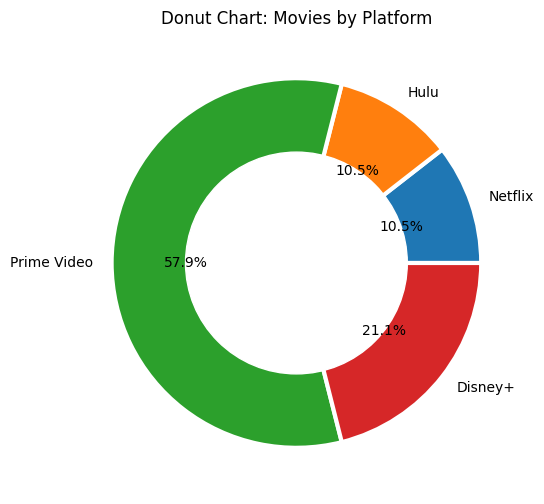

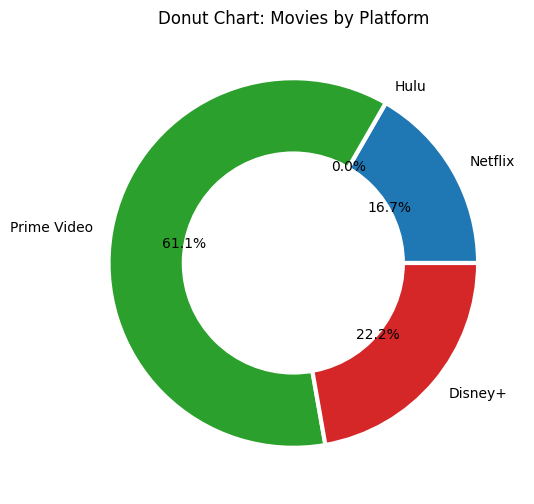

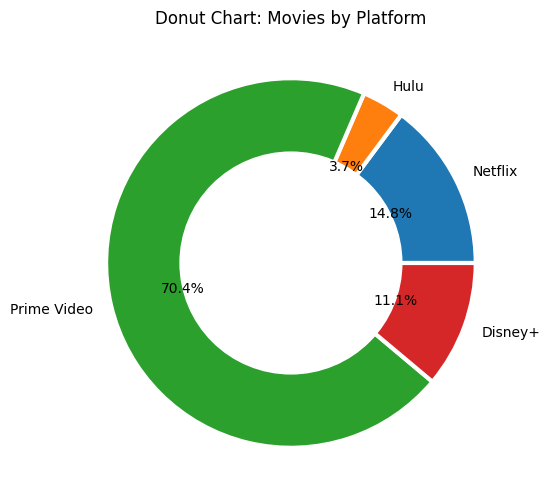

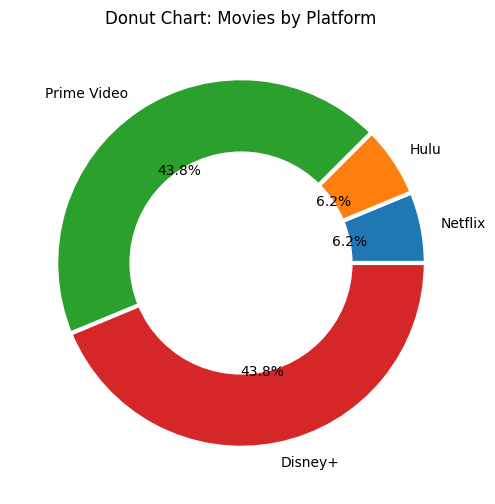

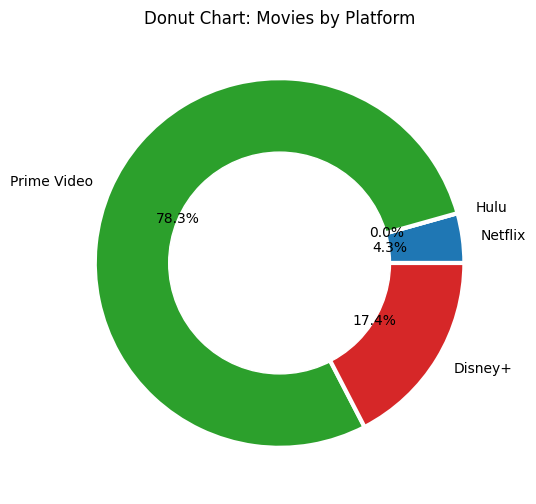

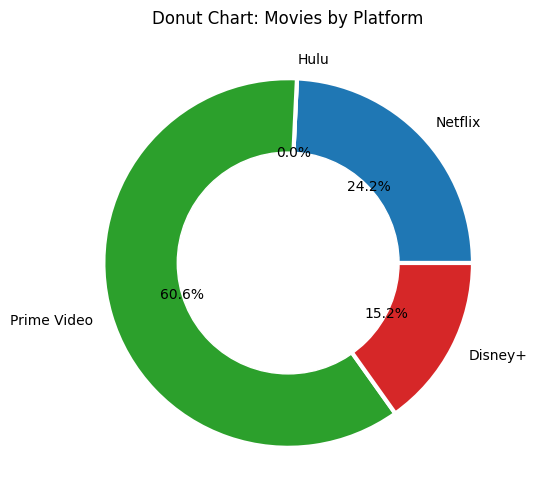

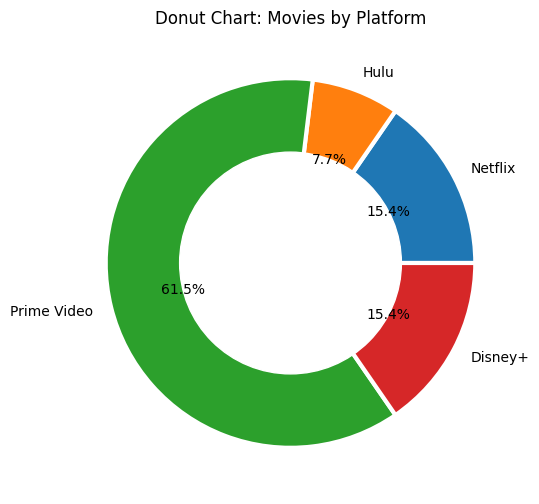

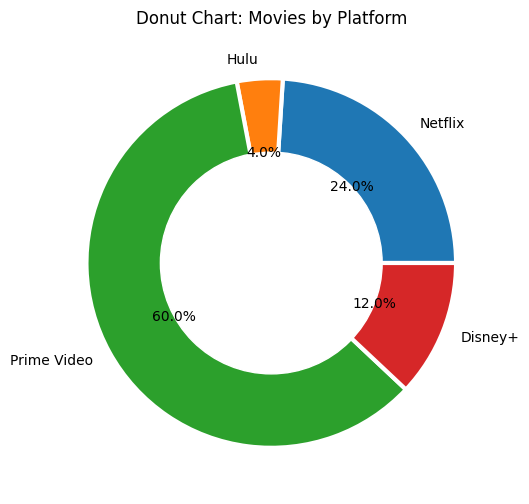

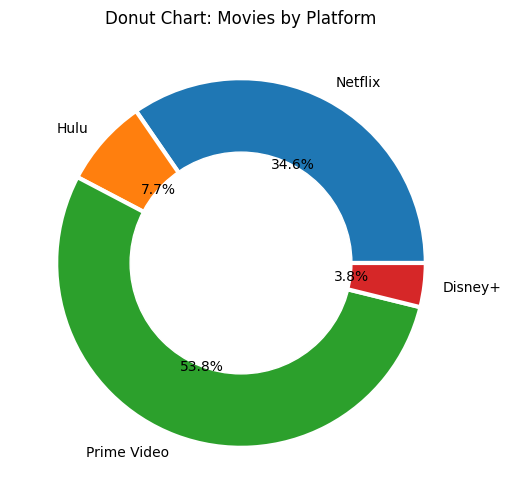

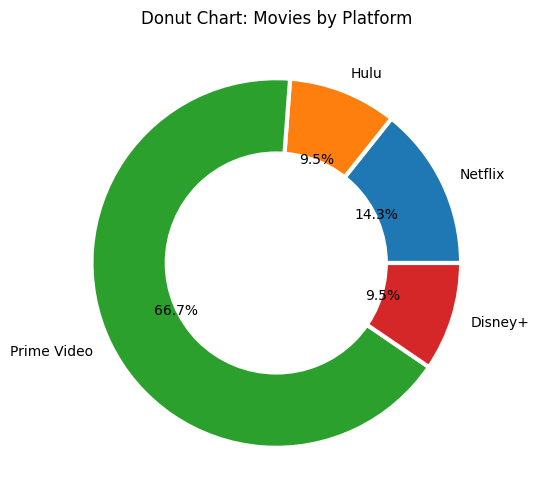

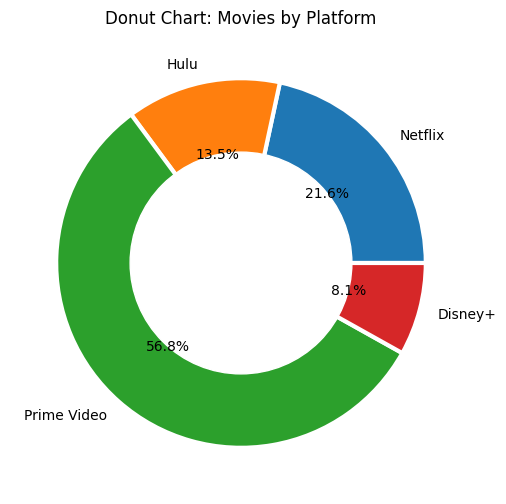

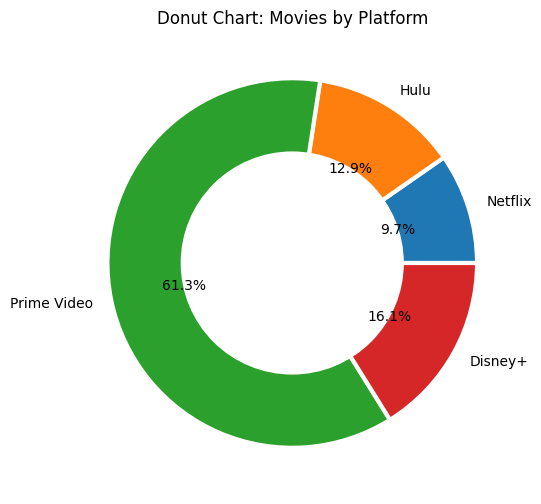

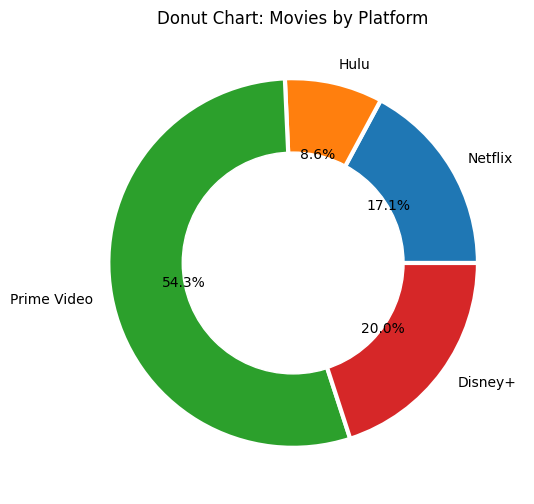

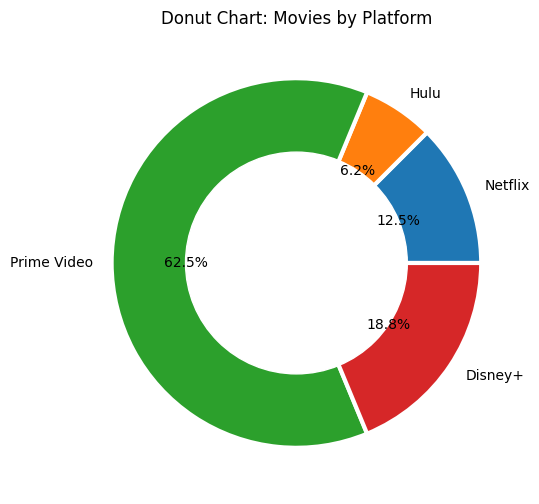

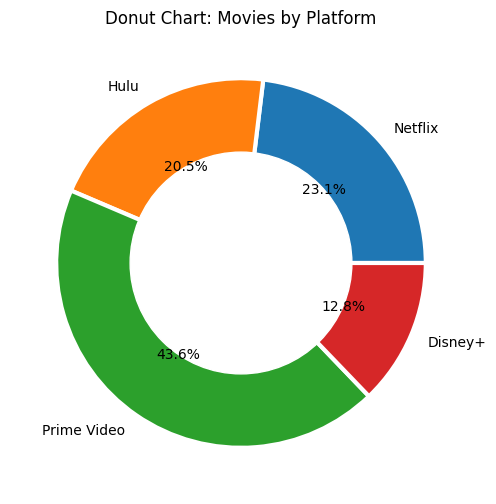

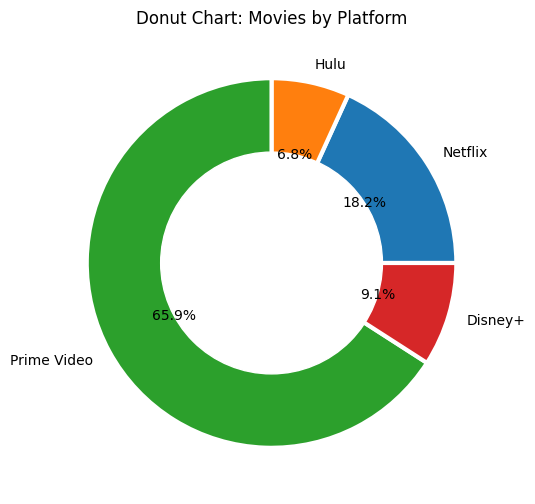

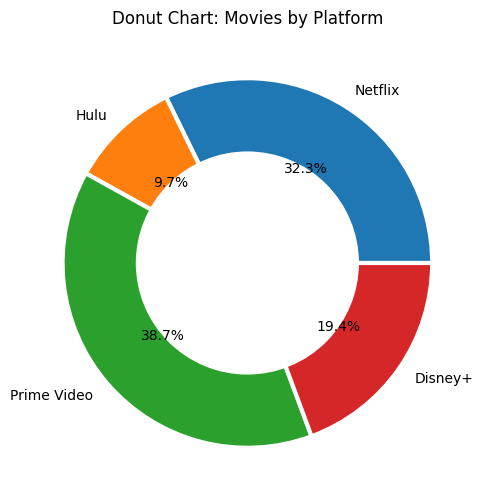

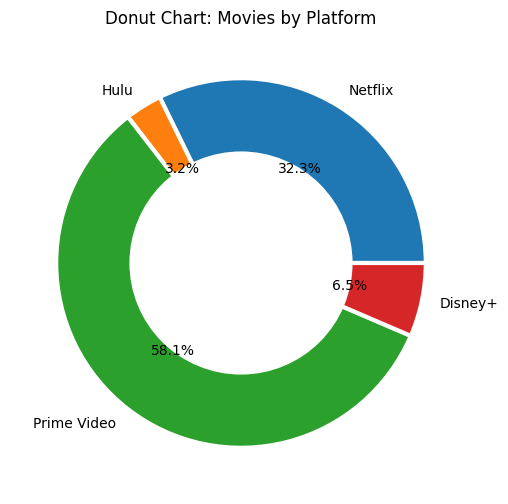

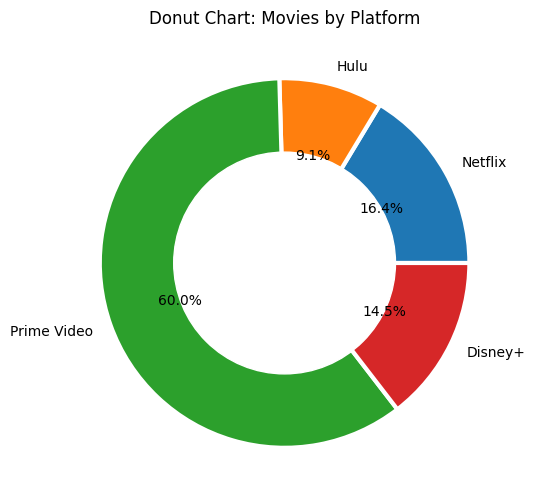

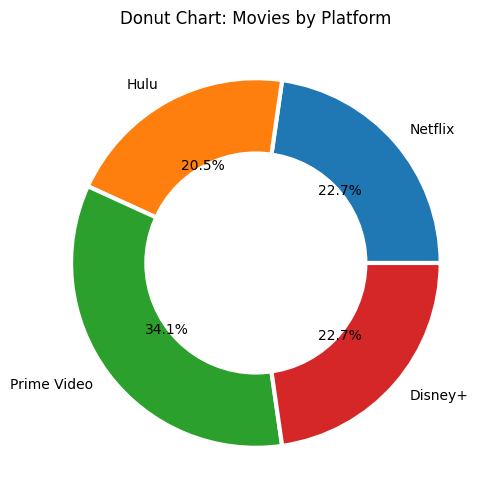

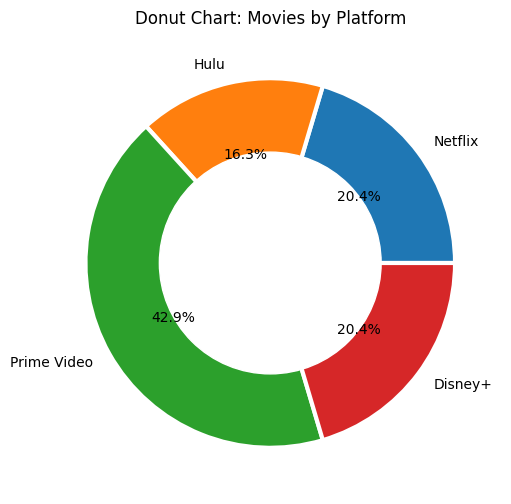

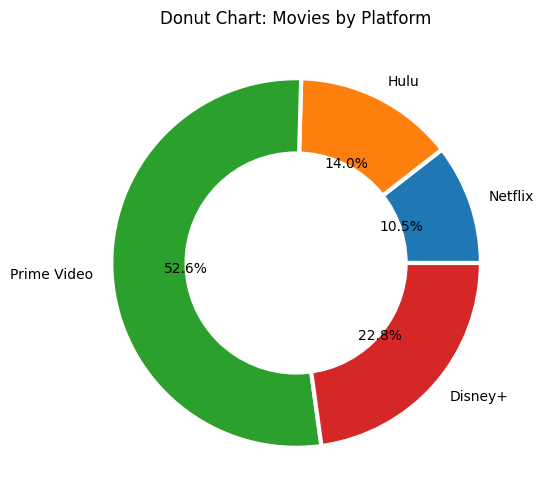

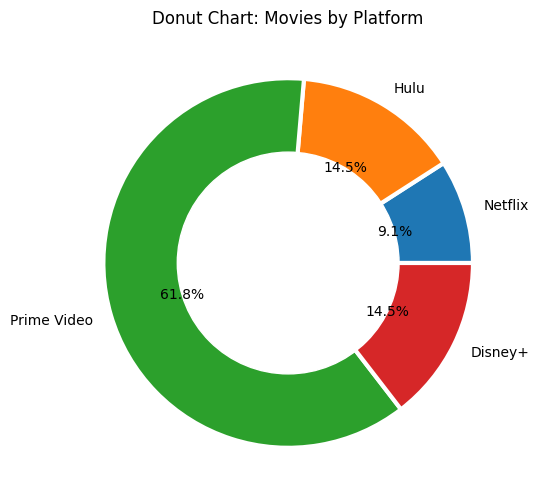

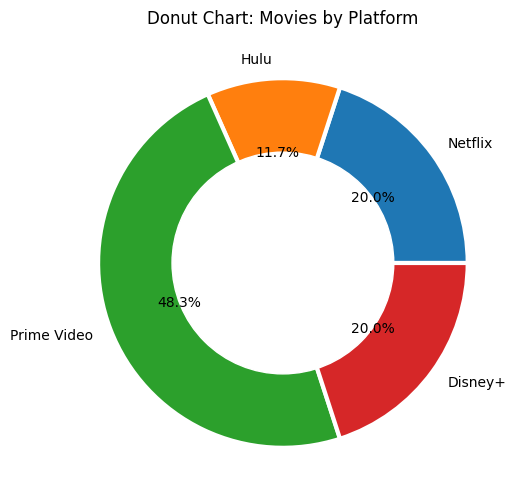

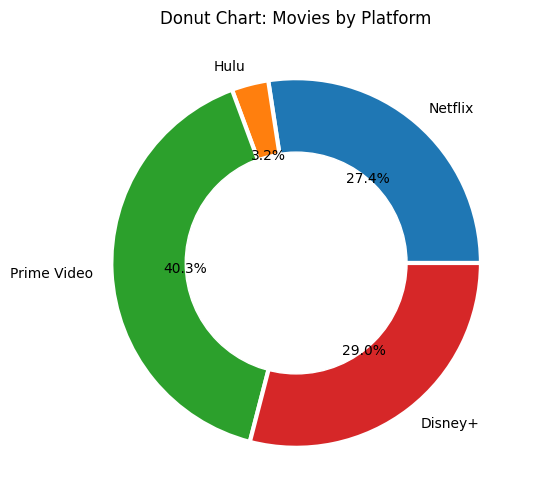

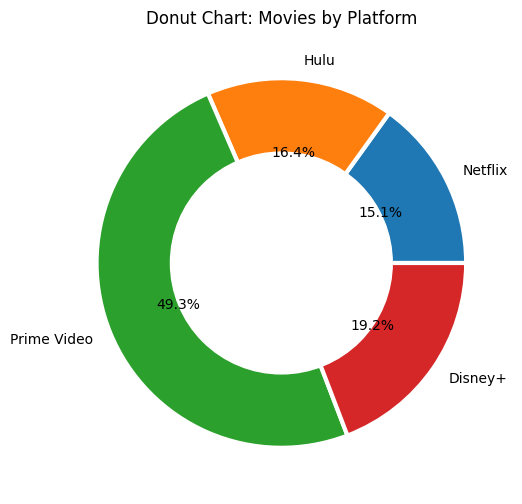

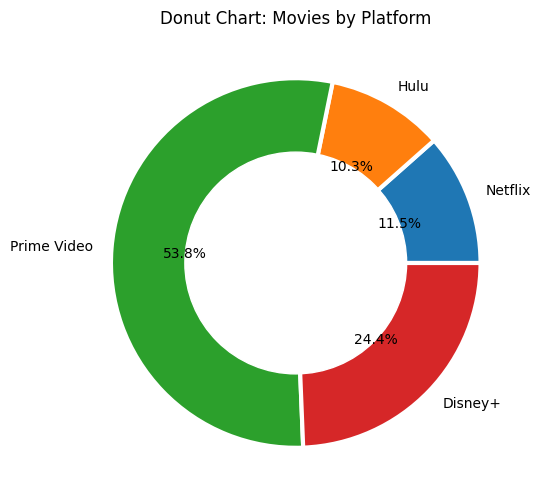

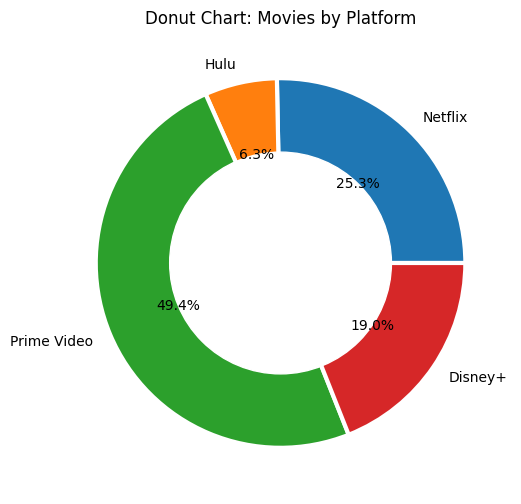

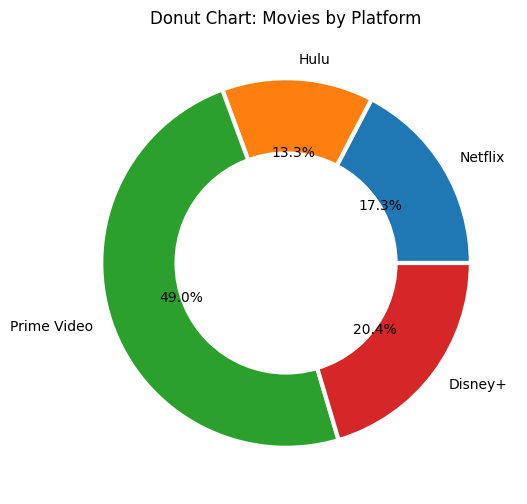

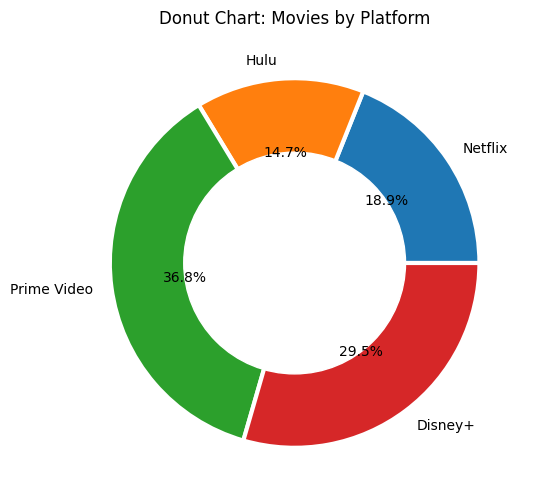

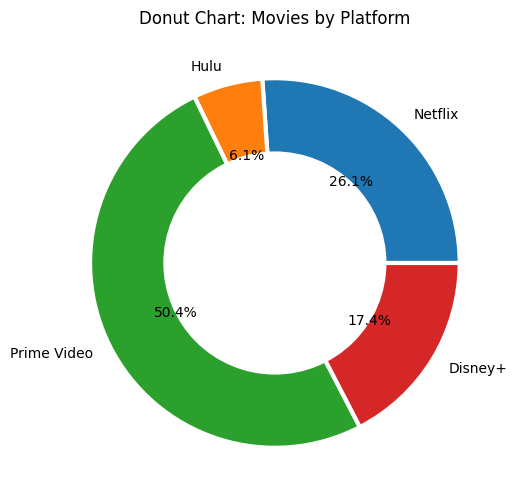

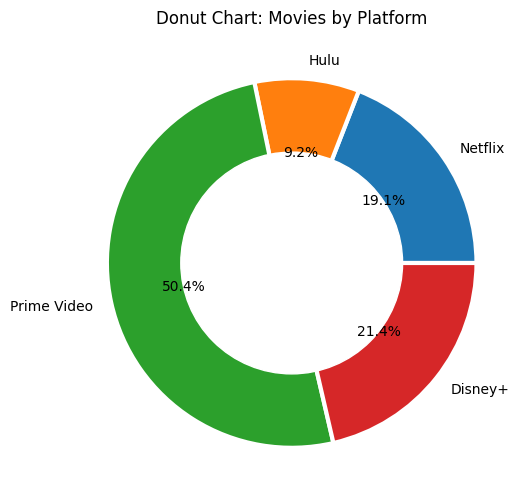

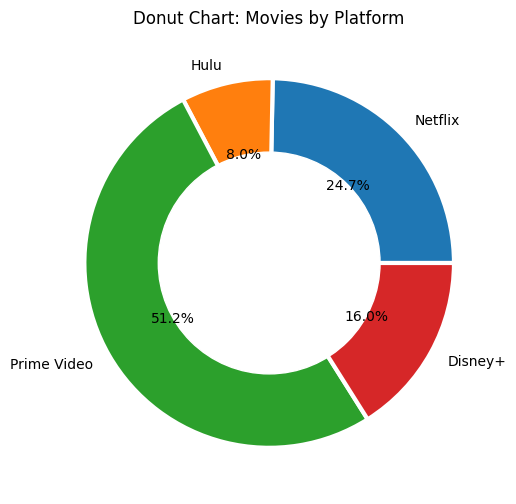

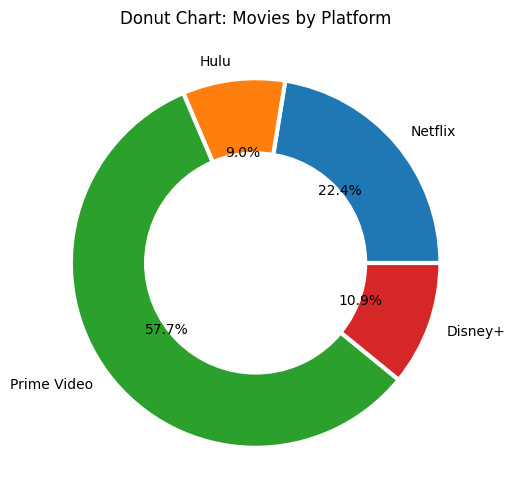

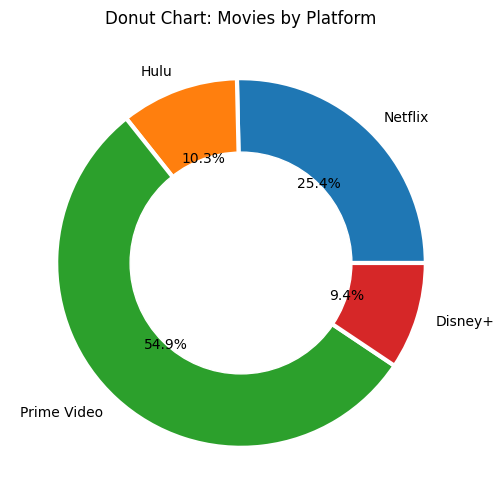

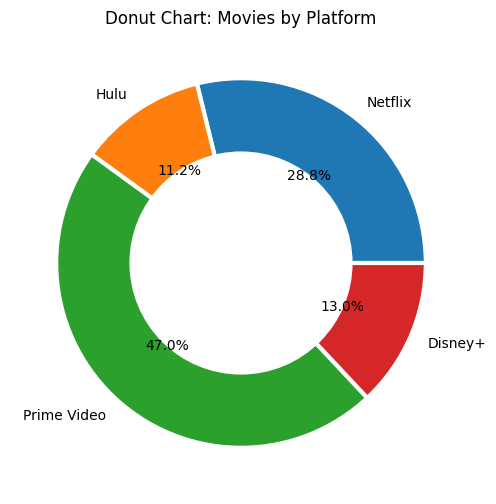

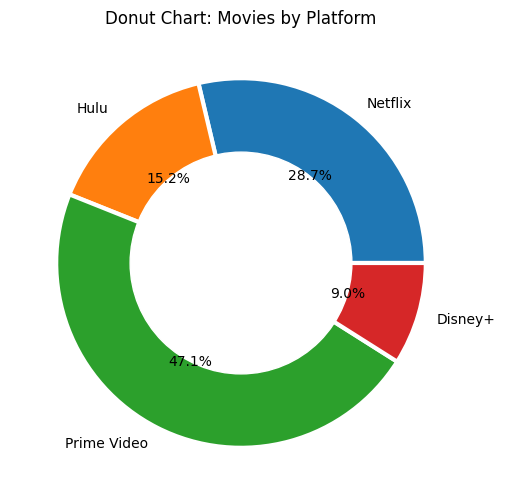

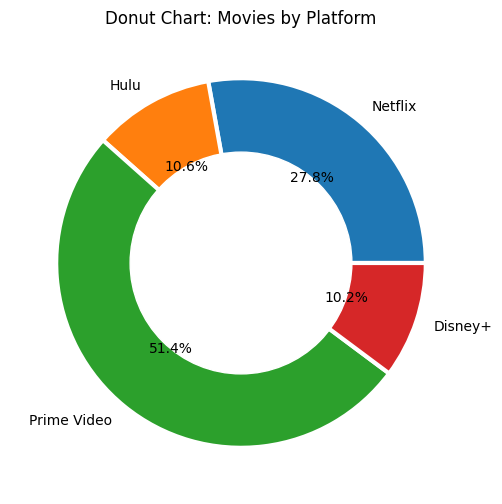

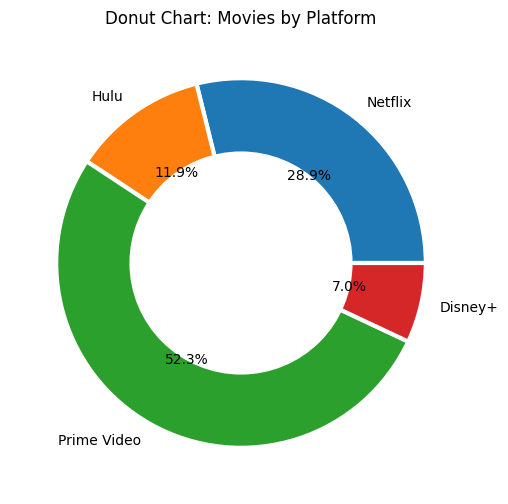

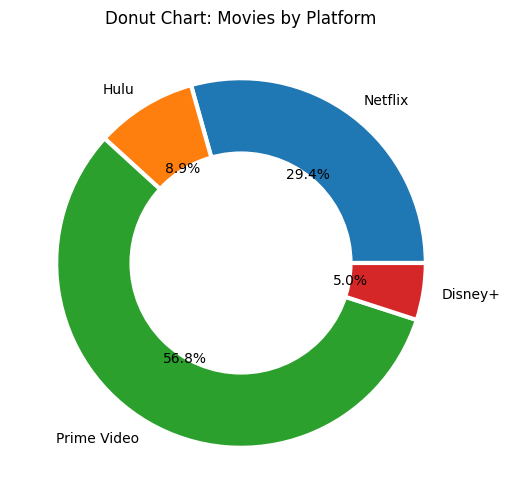

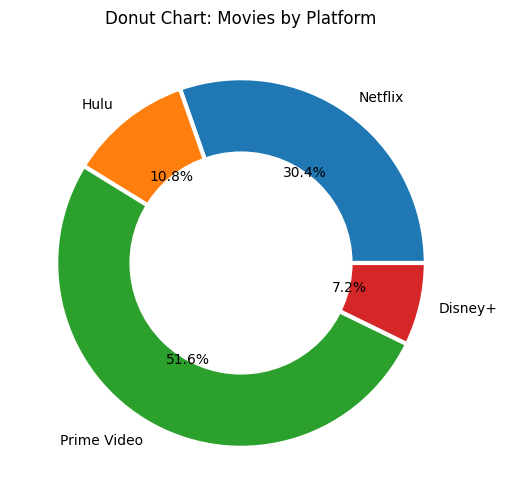

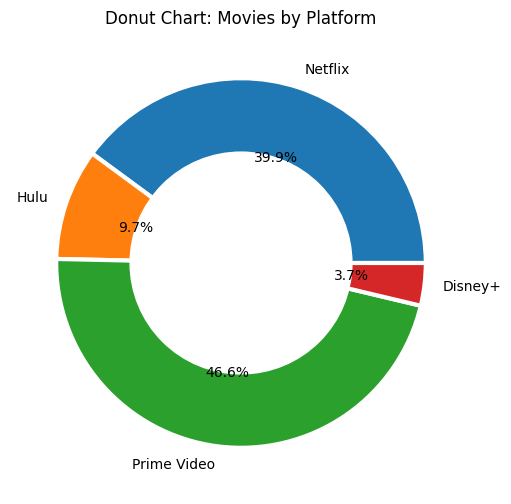

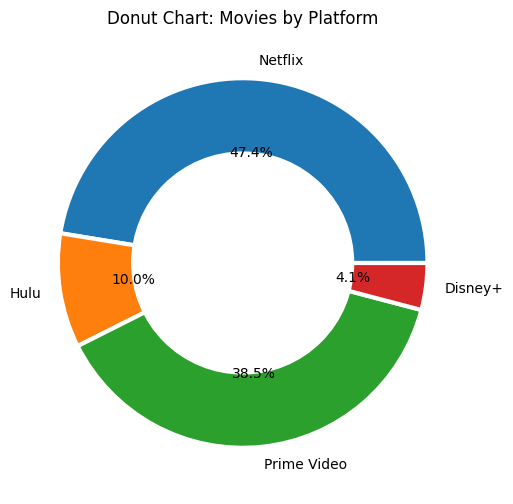

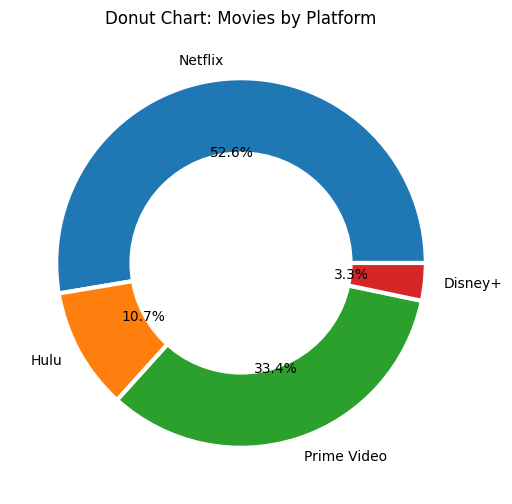

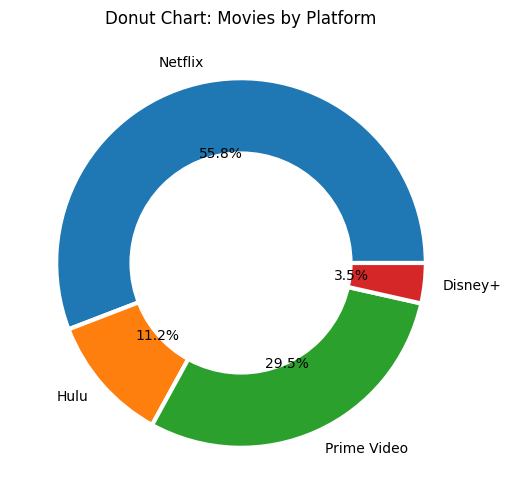

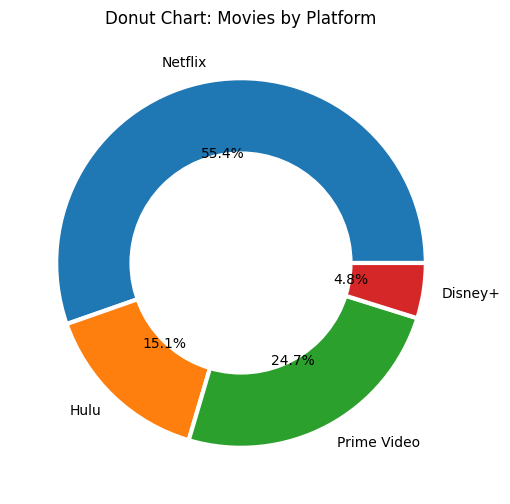

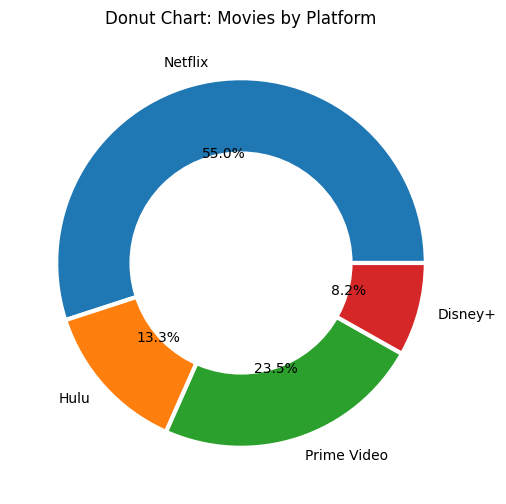

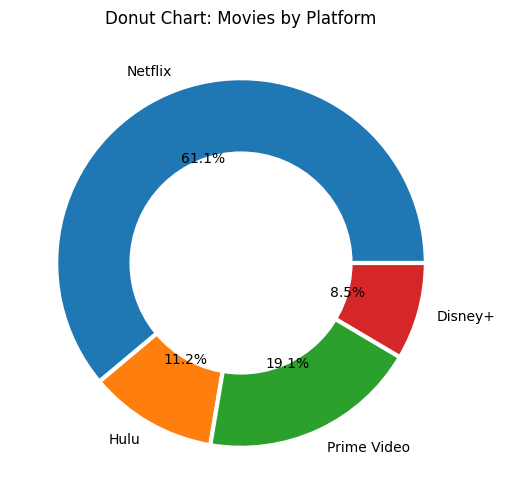

In [18]:
pdf = PDFWithBackground()
pdf.set_background('Images/background.png')

pdf.add_page()

pdf.set_y(100)
pdf.set_font('Courier', style = 'B', size = 57)
pdf.cell(0,0,'Reporte',0,1,'C')

pdf.set_y(125)
pdf.set_font('Courier', style = 'B', size = 57)
pdf.cell(0,0,'automático en',0,1,'C')

pdf.set_y(150)
pdf.set_font('Courier', style = 'B', size = 57)
pdf.cell(0,0,'Python',0,1,'C')

pdf.set_y(170)
pdf.set_font('Courier', size = 27)
pdf.cell(0,0,'Curso de Python',0,1,'C')

pdf.set_y(180)
pdf.set_font('Courier', size = 17)
pdf.cell(0,0,'Desde aspectos básicos hasta aplciaciones analíticas.',0,1,'C')

pdf.add_page()

pdf.set_y(45)
pdf.set_font('Courier',style = 'B', size = 27) # Vienen por defecto, Arial, Times, Courier
pdf.cell(0,0,'Mi primer reporte',0,1,'R')

pdf.set_y(54)
pdf.set_font('Courier', size = 14) # Vienen por defecto, Arial, Times, Courier
pdf.cell(0,0,'Desarrollado con python :D',0,1,'R')

pdf.set_y(75)
pdf.set_font('Courier',size = 20) # Vienen por defecto, Arial, Times, Courier
pdf.cell(0,0,'reporte general por anios y edades permitidas',0,1,'R')

imagen = 'visualization.png'

pdf.image(f'Images/{imagen}',x=15,y=83,w=190,h=65)

pdf.set_y(155)
pdf.set_font('Courier',size=15)
pdf.multi_cell(190,6,'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin lectus lacus, ultricies eu dolor eget, molestie pulvinar turpis. Vestibulum cursus elementum lectus in bibendum. Nam sollicitudin accumsan elit, in condimentum sapien egestas pellentesque. Cras sagittis ornare quam, ut faucibus lorem congue in. Nullam sit amet tristique diam. Praesent ultrices fringilla.',0,1,'L')

years = [i for i in range(1914,2022)]

for year in years:
    try:
        histograma_grafico(year)
        dona_grafico(year)

        pdf.add_page()

        pdf.set_y(45)
        pdf.set_font('Courier', style = 'B', size = 23) # Vienen por defecto, Arial, Times, Courier
        pdf.cell(0,0,f'Reporte del año {year}',0,1,'R')

        pdf.image(f'Images/donut_platform_year_{year}.png',x=15,y=63,w=90,h=90)
        pdf.image(f'Images/histogram_age_year_{year}.png',x=15,y=143,w=90,h=65)

        pdf.set_y(103)
        pdf.set_font('Courier', style = 'B', size = 13) # Vienen por defecto, Arial, Times, Courier
        pdf.cell(0,0,f'Películas por plataforma {year}',0,1,'R')

        pdf.set_y(178)
        pdf.set_font('Courier', style = 'B', size = 13) # Vienen por defecto, Arial, Times, Courier
        pdf.cell(0,0,f'Edades permitidas por película {year}',0,1,'R')
    except:
        print(f'El año {year} no se encuentra en la base.')

pdf.output('Mi_Primer_PDF.pdf')


# Reportes en Excel personalizados

In [40]:
def plataforma(year):
    base_filtrada_year = base[base['Year']==year]
    
    return base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum()

def edades_permitidas(year):
    base_filtrada_year = base[base['Year']==year]

    cantidad_aux = base.groupby(by = 'Age').count()[['ID']].reset_index() #Número de películas por año
    cantidad_aux.columns = ['Age','Amount']
    return cantidad_aux


In [41]:
plataforma(2010)
edades_permitidas(2010)

Age  Amount
0  13+     998
1  16+     276
2  18+    2276
3   7+    1090
4  all     698

In [42]:
from openpyxl import Workbook
from openpyxl.styles import Font, Color, Alignment, PatternFill, Border
from openpyxl.drawing.image import Image

# Crear un nuevo libro y seleccionar la hoja activa
wb = Workbook()
ws = wb.active

year = 2020

# Añadir texto a una celda
ws['E1'] = f"Reporte Personalizado {year}"

# Establecer fuente, tamaño y color
ws['E1'].font = Font(name='American Typewriter', size = 20, bold=True, italic=True,color='005DFF')


# Ajustar el tamaño de la celda
ws.row_dimensions[1].height = 30 # Mi letra es de 20
ws.column_dimensions['E'].width = 60

# Alinear el texto
ws['E1'].alignment = Alignment(horizontal='center',vertical='center')

# Aplicar un color de fondo a una celda
ws['E1'].fill = PatternFill(start_color='050505',end_color='050505',fill_type = 'solid')

img = Image(f'Images/donut_platform_year_{year}.png')
ws.add_image(img,'A4')

img = Image(f'Images/histogram_age_year_{year}.png')
ws.add_image(img,'F4')

plataformas = ['Netflix','Hulu','Prime Video', 'Disney+']
valores = plataforma(year)

edades = edades_permitidas(year)

for i in range(37,41):
    ws[f'C{str(i)}'] = plataformas[i-37]
    ws[f'C{str(i)}'].font = Font(name='American Typewriter', size = 12, bold=True, italic=True,color='005DFF')
    ws[f'D{str(i)}'] = valores[plataformas[i-37]]

for i in range(37,41):
    ws[f'L{str(i)}'] = edades.iloc[i-37]['Age']
    ws[f'L{str(i)}'].font = Font(name='American Typewriter', size = 12, bold=True, italic=True,color='005DFF')
    ws[f'M{str(i)}'] = edades.iloc[i-37]['Amount']

# Guaradar el libro de trabajo
wb.save('reporte_personalizado.xlsx')